In [57]:
import numpy as np
from scipy.linalg import expm
from scipy.optimize import least_squares
from optimizer_optimated import Optimizer
import pandas as pd


In [70]:
data_path = "/u/dem/kebl6911/Part-II/MATRICES/Ct_exc.out"

column_names = ["Time"]
list = [str(i) + str(j) for i in range(1, 8) for j in range(1, 8)]
column_names = column_names + list
df = pd.read_csv(data_path, delimiter=" ", names=column_names, usecols=range(len(column_names)))
df = df[(df.index % 10 == 0) | (df.index == len(df.index) - 1)]
print(df.head(10))

values  = df.values



    Time       11       12       13       14       15       16       17  \
0    0.0  1.00093 -0.00162 -0.00083 -0.00015 -0.00022  0.00060  0.00089   
10   5.0  0.99652  0.00159 -0.00045 -0.00005  0.00048  0.00066  0.00084   
20  10.0  0.98440  0.01034  0.00032  0.00033  0.00232  0.00095  0.00094   
30  15.0  0.96652  0.02337  0.00143  0.00095  0.00491  0.00135  0.00108   
40  20.0  0.94504  0.03943  0.00274  0.00172  0.00779  0.00169  0.00119   
50  25.0  0.92174  0.05732  0.00412  0.00254  0.01065  0.00197  0.00126   
60  30.0  0.89837  0.07585  0.00554  0.00330  0.01321  0.00211  0.00123   
70  35.0  0.87611  0.09402  0.00696  0.00395  0.01540  0.00210  0.00105   
80  40.0  0.85520  0.11142  0.00831  0.00454  0.01716  0.00210  0.00087   
90  45.0  0.83644  0.12740  0.00964  0.00504  0.01843  0.00202  0.00062   

         21       22  ...       65       66       67       71       72  \
0  -0.00150  1.00008  ... -0.00034  0.99941  0.00072  0.00064  0.00017   
10  0.00176  0.99222  ... 

In [59]:
import matplotlib.pyplot as plt

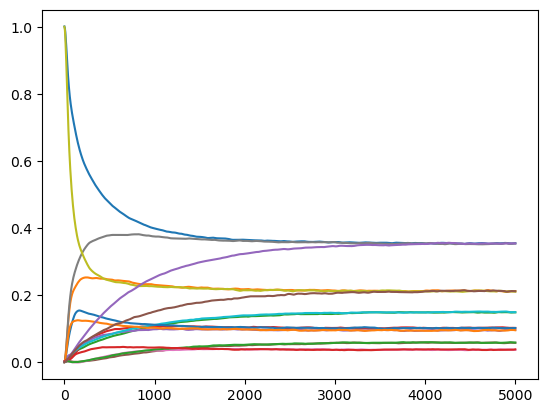

In [60]:
for i in range(1,17):
    plt.plot(values[:,0],values[:,i])


# Reshape one row or 28 C(t) into 7x7 matrix
- Row - population of state i at time t
- Column: Differnt Initial Conditions

In [61]:

ns=7
times = values[:,0]
Ct = values[:,1:]
print(np.shape(Ct))

Ct = [row.reshape(ns,ns) for row in Ct]

Ct = np.array(Ct)
print(Ct.shape) #4x7 matrix so Pj(0),Pi(t)

# Convert to 7x4 matrix
Ct = np.transpose(Ct, (0,2,1))
print(Ct.shape)

print(Ct)



(1001, 49)
(1001, 7, 7)
(1001, 7, 7)
[[[ 1.00093e+00 -1.50000e-03 -1.18000e-03 ... -2.30000e-04  7.50000e-04
    6.40000e-04]
  [-1.62000e-03  1.00008e+00 -1.13000e-03 ...  7.00000e-05 -9.50000e-04
    1.70000e-04]
  [-8.30000e-04 -6.60000e-04  1.00463e+00 ...  6.00000e-04  2.90000e-04
    4.20000e-04]
  ...
  [-2.20000e-04  2.00000e-04  2.60000e-04 ...  9.99390e-01 -3.40000e-04
    5.80000e-04]
  [ 6.00000e-04 -9.70000e-04 -2.00000e-04 ... -5.00000e-04  9.99410e-01
    3.20000e-04]
  [ 8.90000e-04  5.50000e-04  3.20000e-04 ...  8.30000e-04  7.20000e-04
    9.98960e-01]]

 [[ 9.96520e-01  1.76000e-03 -9.80000e-04 ...  5.30000e-04  7.80000e-04
    7.70000e-04]
  [ 1.59000e-03  9.92220e-01 -8.40000e-04 ...  2.11000e-03 -5.80000e-04
    6.50000e-04]
  [-4.50000e-04 -4.00000e-04  9.99860e-01 ...  5.60000e-04  4.04000e-03
    6.00000e-04]
  ...
  [ 4.80000e-04  2.41000e-03  3.90000e-04 ...  9.90800e-01 -3.80000e-04
    3.79000e-03]
  [ 6.60000e-04 -8.20000e-04  3.72000e-03 ... -1.00000e-04 

In [73]:
data_path = "/u/dem/kebl6911/Part-II/MATRICES/Ct_exc.out"

data = np.loadtxt(data_path)

t = data[:,0]
Ct = data[:,1:].reshape((-1,7,7))
Ct = np.einsum("tij->tji",Ct)

Get Peq, check Kappa

In [74]:
import numpy as np

from scipy.linalg import expm,logm
from scipy.optimize import least_squares
from optimagic_optimizer import Optimizer
import pandas as pd

In [90]:
print(times)

t_star = np.where(times == 1000) #currently testing

#### Find Peq
peq = Ct[-1]
print(peq)
peq = np.mean(peq, axis=1)
print(peq)



[   0.    5.   10. ... 4990. 4995. 5000.]
[[0.35395 0.35277 0.35323 0.35236 0.35168 0.35042 0.35294]
 [0.21064 0.20925 0.21046 0.21154 0.20918 0.20947 0.20868]
 [0.14737 0.1479  0.14998 0.14903 0.14823 0.14887 0.1479 ]
 [0.10065 0.10077 0.10126 0.10189 0.10208 0.10242 0.10227]
 [0.09493 0.09398 0.09446 0.09297 0.09351 0.09272 0.09426]
 [0.05654 0.057   0.05803 0.05686 0.05772 0.05961 0.05917]
 [0.03552 0.03679 0.03531 0.03584 0.03726 0.03473 0.03665]]
[0.35247857 0.20988857 0.14846857 0.10162    0.09383286 0.05784714
 0.03601429]


In [86]:
# Find 1/t*(logC(0))

Czero = Ct[0]
logczero = logm(Czero)

r_500 = (1/times[t_star])*logczero
print(r_500)

[[ 9.27313087e-07 -1.49932936e-06 -1.17756780e-06 -2.48781061e-07
  -2.29700062e-07  7.48858631e-07  6.40454899e-07]
 [-1.61939627e-06  7.76916359e-08 -1.12844550e-06  5.38598072e-07
   6.99998882e-08 -9.49080999e-07  1.70759028e-07]
 [-8.28418828e-07 -6.59220148e-07  4.61833343e-06  2.99422042e-07
   5.98700790e-07  2.89609997e-07  4.19233257e-07]
 [-1.49098797e-07  7.58363055e-07  4.99659955e-08  1.45664184e-06
  -5.10576821e-07 -1.63924919e-06  7.80221173e-07]
 [-2.19896864e-07  1.99876782e-07  2.59350676e-07 -6.00457615e-07
  -6.10775920e-07 -3.40766350e-07  5.80767085e-07]
 [ 5.98692358e-07 -9.69186793e-07 -1.99730719e-07 -1.88911540e-06
  -5.00753608e-07 -5.92580420e-07  3.21076869e-07]
 [ 8.90573745e-07  5.50951535e-07  3.20203168e-07  9.30651127e-07
   8.31091005e-07  7.21374174e-07 -1.04166077e-06]]


In [94]:
matkappa = r_500/peq[:,np.newaxis]

[[ 2.63083535e-06 -4.25367522e-06 -3.34082097e-06 -7.05804782e-07
  -6.51670995e-07  2.12455080e-06  1.81700379e-06]
 [-7.71550473e-06  3.70156581e-07 -5.37640280e-06  2.56611433e-06
   3.33509765e-07 -4.52183267e-06  8.13569921e-07]
 [-5.57975887e-06 -4.44013262e-06  3.11064718e-05  2.01673687e-06
   4.03250859e-06  1.95064850e-06  2.82371719e-06]
 [-1.46721902e-06  7.46273426e-06  4.91694504e-07  1.43342043e-05
  -5.02437336e-06 -1.61311670e-05  7.67783087e-06]
 [-2.34349535e-06  2.13013638e-06  2.76396439e-06 -6.39922553e-06
  -6.50919026e-06 -3.63163140e-06  6.18937868e-06]
 [ 1.03495580e-05 -1.67542725e-05 -3.45273266e-06 -3.26570216e-05
  -8.65649682e-06 -1.02439013e-05  5.55043609e-06]
 [ 2.47283468e-05  1.52981386e-05  8.89100426e-06  2.58411658e-05
   2.30767038e-05  2.00302230e-05 -2.89235437e-05]]


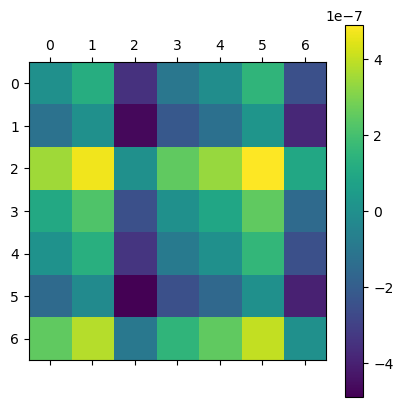

In [92]:
plt.matshow(r_500-r_500.transpose())
plt.colorbar()

In [67]:
#Find Kappa from R - tEST mATRIX

kappas = np.array([1,2,3])
eq_pop = np.array([1,2,3])

matkappa = np.zeros((3,3))
triangle = np.triu(np.ones((3, 3), dtype=bool), k=1)
matkappa[triangle]= kappas
matkappa += matkappa.T

print(matkappa)

matr = np.zeros((3,3))
matr = np.multiply(matkappa, eq_pop[:, np.newaxis])
print(matr)
rdiag = -np.sum(matr,0)
matr = matr + np.diag(rdiag)

print(matr)
print(eq_pop)

print(matr/eq_pop[:, np.newaxis])

[[0. 1. 2.]
 [1. 0. 3.]
 [2. 3. 0.]]
[[0. 1. 2.]
 [2. 0. 6.]
 [6. 9. 0.]]
[[ -8.   1.   2.]
 [  2. -10.   6.]
 [  6.   9.  -8.]]
[1 2 3]
[[-8.          1.          2.        ]
 [ 1.         -5.          3.        ]
 [ 2.          3.         -2.66666667]]
